In [113]:
!pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00a 0:00:01


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
sleep_data = pd.read_csv("sleep-export.csv")
for c_col in ['From', 'To']:
    sleep_data[c_col] = pd.to_datetime(sleep_data[c_col], format='%d. %m. %Y %H:%M').dt.normalize()
sleep_data = sleep_data.query('From >= "2022-09-01"').groupby(['From']).agg({'Hours': 'sum'}).reset_index()
new_rows = [
    {'From': pd.to_datetime('2022-09-04'), 'Hours':7.3},
    {'From': pd.to_datetime('2022-09-11'), 'Hours':4.2},
    {'From': pd.to_datetime('2022-09-17'), 'Hours':9.0}
]
sleep_data = sleep_data.append(new_rows, ignore_index=True)

sleep_data

/tmp/ipykernel_71/351388.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sleep_data = sleep_data.append(new_rows, ignore_index=True)


,From,Hours
0,2022-09-01,4.35
1,2022-09-02,5.39
2,2022-09-03,12.38
3,2022-09-05,12.12
4,2022-09-07,3.08
5,2022-09-08,5.42
6,2022-09-09,3.10
7,2022-09-10,5.89
8,2022-09-12,5.13
9,2022-09-13,4.18


In [129]:
pedometer_day_summary = pd.read_csv("pedometer_day_summary.csv")
for c_col in ['create_time', 'update_time']:
    pedometer_day_summary[c_col] = pd.to_datetime(pedometer_day_summary[c_col]).dt.normalize()

pedometer_day_summary = pedometer_day_summary.query('update_time >= "2022-09-01"').drop_duplicates(subset='step_count', keep="first")
pedometer_day_summary = pedometer_day_summary.groupby(['update_time']).agg({'step_count': 'sum', 'distance': 'sum', 'calorie': 'sum'}).reset_index()
pedometer_day_summary

,update_time,step_count,distance,calorie
0,2022-09-01,6070,4652.77000,185.739990
1,2022-09-02,11666,9080.98900,366.029940
2,2022-09-03,5364,4045.73000,162.159990
3,2022-09-04,16734,12518.83000,521.709960
4,2022-09-05,15201,11520.34960,468.909910
5,2022-09-07,3356,2582.74000,104.789970
6,2022-09-09,3001,2420.53000,104.740000
7,2022-09-10,4170,3217.84990,137.619980
8,2022-09-11,6451,4833.37000,200.019990
9,2022-09-12,3740,2895.67000,122.559980


In [130]:
comb_pedo_sleep = pedometer_day_summary.join(sleep_data.set_index('From'), on='update_time')
comb_pedo_sleep

,update_time,step_count,distance,calorie,Hours
0,2022-09-01,6070,4652.77000,185.739990,4.35
1,2022-09-02,11666,9080.98900,366.029940,5.39
2,2022-09-03,5364,4045.73000,162.159990,12.38
3,2022-09-04,16734,12518.83000,521.709960,7.30
4,2022-09-05,15201,11520.34960,468.909910,12.12
5,2022-09-07,3356,2582.74000,104.789970,3.08
6,2022-09-09,3001,2420.53000,104.740000,3.10
7,2022-09-10,4170,3217.84990,137.619980,5.89
8,2022-09-11,6451,4833.37000,200.019990,4.20
9,2022-09-12,3740,2895.67000,122.559980,5.13


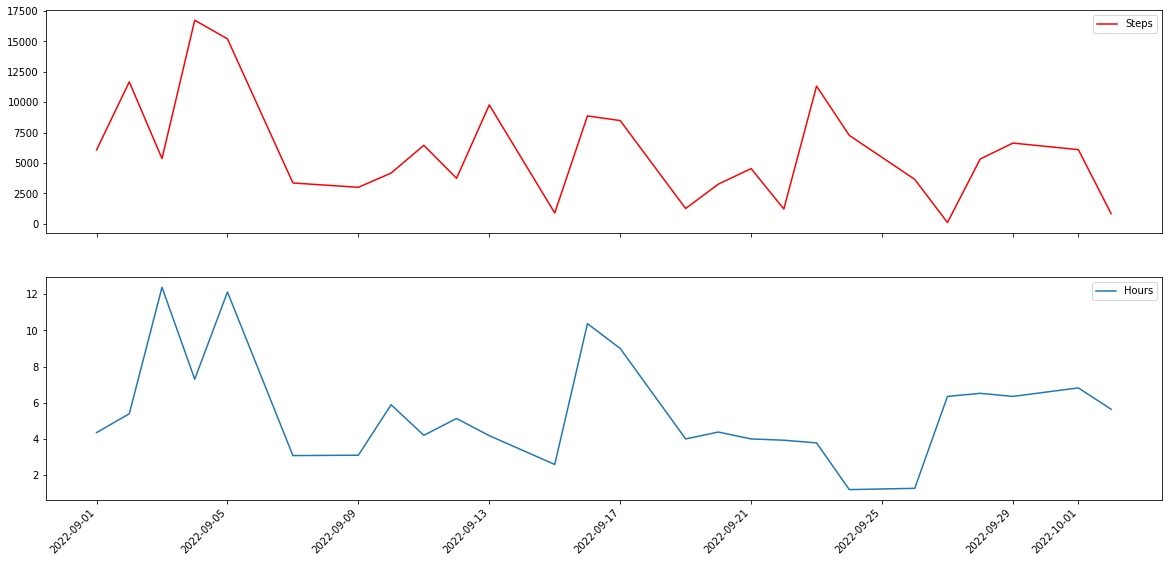

In [132]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 10))
ax1.plot(comb_pedo_sleep['update_time'], comb_pedo_sleep['step_count'], '-', label = 'Steps', color='red')
ax2.plot(comb_pedo_sleep['update_time'], comb_pedo_sleep['Hours'], '-', label = 'Hours')
ax1.legend()
ax2.legend()
fig.autofmt_xdate(rotation = 45)